Objective

Data Visualization

Let's practice what we have learned so far and visualize some data!

In order to validate this checkpoint you must accomplish the following tasks:

Preprocessing phase:

After importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('titanic-passengers.csv', sep = ';')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


As a next step, apply what you have learned in the course to preprocess your data: find missing information and replace it with the appropriate values.

Verify that your data is ready to be treated.

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop('Cabin', axis= 1 , inplace = True)
# most missing values are in the cabin column which is of categorical data type 
# with that much missing data I concluded that filling NAN with the most common value would affect the dataset balance hence dropping it

In [7]:
Mean= df['Age'].mean()
df['Age'].fillna(Mean,inplace=True)

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

2. Visualization phase:

Start by studying the distribution of the most important features based on your understanding of the dataset and the problem.

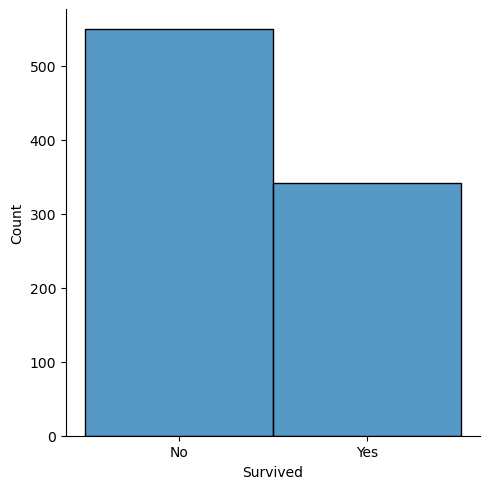

In [9]:
sns.displot(data = df['Survived'])
# visualizing the number of people who survived and those who didn't 

<AxesSubplot:xlabel='Sex', ylabel='count'>

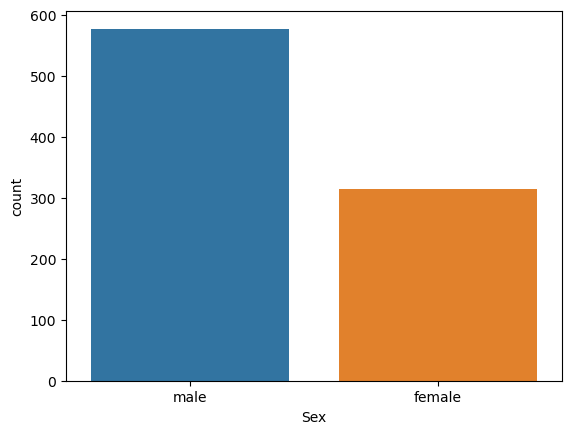

In [10]:
sns.countplot(x='Sex',data= df)
# visualizing the number of male and female passengers

Visualize the correlation between Sex and Age in a plot of your choosing. The visualized plot should give us obvious deductions concerning the importance of age and sex in the survival of the individuals.

<AxesSubplot:xlabel='Age_categories', ylabel='count'>

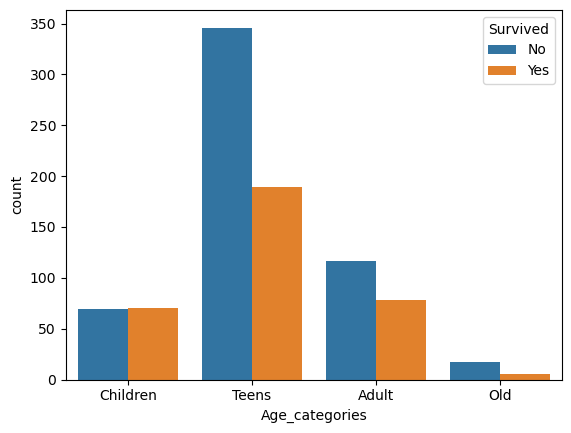

In [11]:
interval = (0,18,35,60,120)
categories = ['Children','Teens','Adult', 'Old']
df['Age_categories']= pd.cut(df.Age, interval, labels = categories)
#categorizing passengers into age groups 
sns.countplot(x = 'Age_categories',  data = df, hue = 'Survived')
#visualizing the correlation between age group and survival

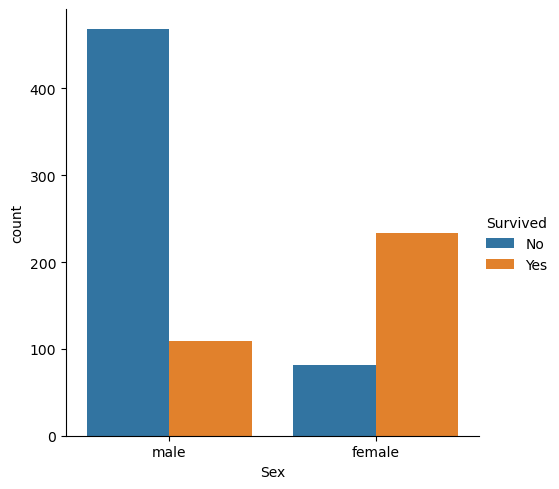

In [12]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = df) 
# visualizing the correlation between sex and survival

<AxesSubplot:xlabel='Sex', ylabel='Age'>

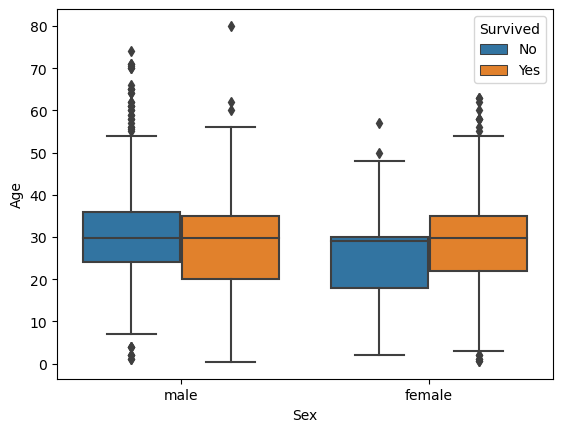

In [13]:
sns.boxplot(x='Sex',y='Age',data=df, hue = 'Survived')
# visualizing the correlation between age and sex 

Pick two other features and study their impact on the survival of the individuals.

In [14]:
encoder = LabelEncoder()
df['Survived']= encoder.fit_transform(df['Survived'])
# encoding categorical data from survived column into numerical data

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

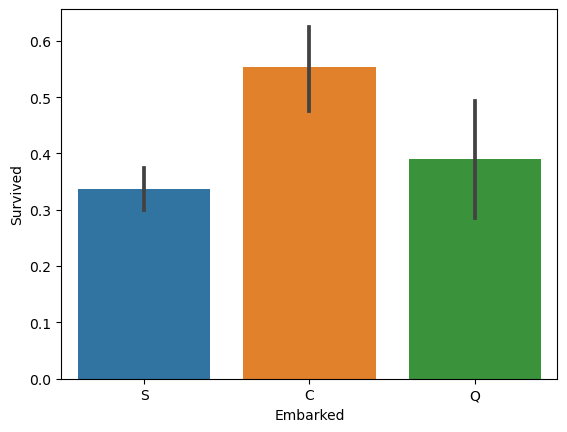

In [15]:
sns.barplot(data = df, x = "Embarked", y = "Survived")
# visualizing the correlation between embarking port and survival

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

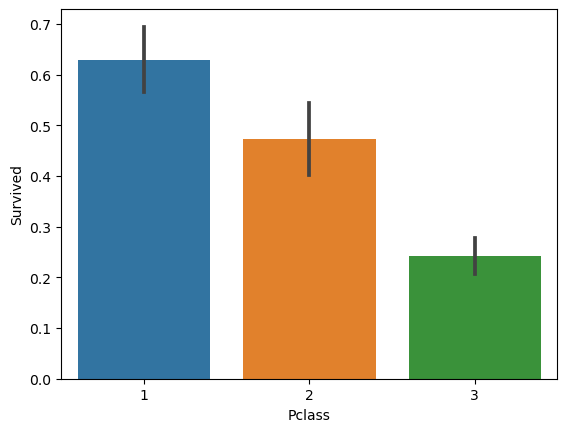

In [16]:
sns.barplot(data = df, x = "Pclass", y = "Survived")
# visualizing the correlation between passenger class and survival

Have a look at this function:
plot_correlation_map()

Try running the function, analyze what it does exactly and its utilities. Write a paragraph describing your analysis (the paragraph should be in English).

In [17]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

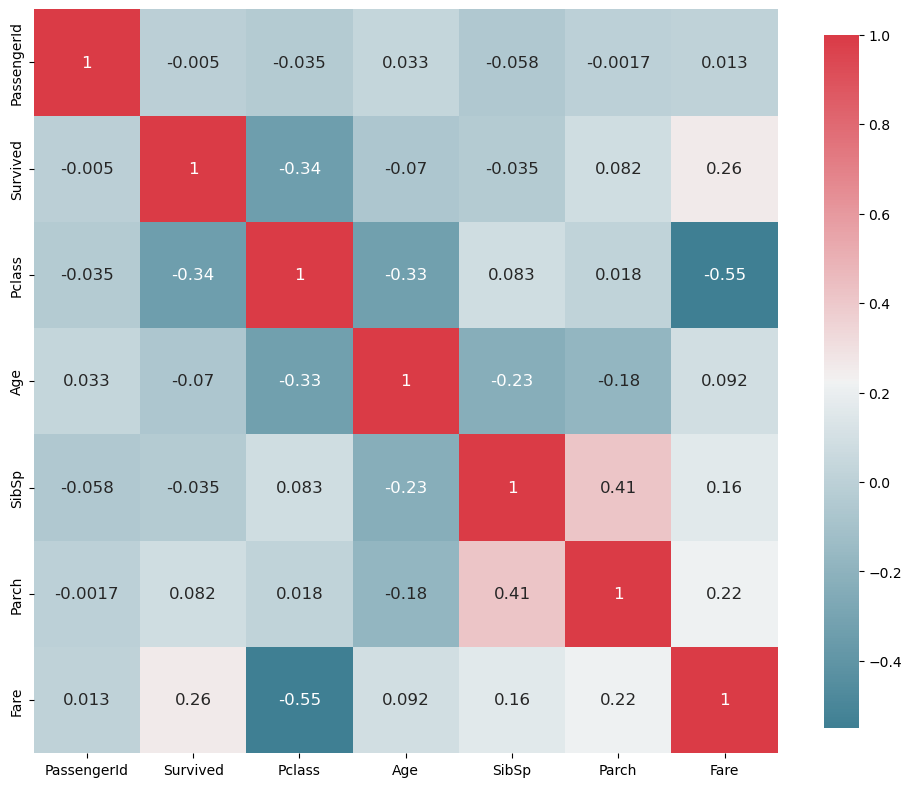

In [18]:
plot_correlation_map(df)

in the above function df.corr is used s used to find the correlation betweenall columns in the dataframe. 
the sns.heatmap is then used to visualize and display this data in a color encoded matrix.
The intensity of color in the map displayed varies based on the value of the attribute represented.

in this case the map shows the correlation between some of the columns of the Titanic dataset. 

some of the insights we can conclude from this map in terms of survival are:

- there is a negative correlation between cabin, age and passenger class and survival.
- while on the other hand, there is a positive correlation between the fare, number od parents or children on the ship (parch), the number of siblings and spouses on the ship (sibsp) and the passenger Id, and survival.


Use the groupby function combined with the mean() to view the relation between Pclass and survived 

In [19]:
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


As a final step, try to drop the useless columns (such as Names).

We dropped the column Names because we evaluated it to be useless. But that's ultimately not the case because we can create a very useful feature from Names.

Your task now is to create a new column called Title which contains the appropriate Title for each individual. Hint: Extract the title from the column Names.

In [20]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')
df.drop(['Name', 'PassengerId', 'Ticket', 'Fare', 'Age_categories'], axis =  1, inplace = True)

Visualize the correlation between Title and other features(e.g Sex, Fare, Age).

As you have seen, there are a lot of titles which makes the feature very impractical. Let's try to group these titles into more useful ones

Let's visualize the same correlations using these new titles now.

In [21]:
Title_Dictionary = {"Capt":"Officer", "Col":"Officer", "Major":"Officer", "Dr":"Officer", "Rev":"Officer", "Jonkheer":"Royalty", "Don":"Royalty", "Sir" :"Royalty", "Lady" :"Royalty", "the Countess": "Royalty", "Dona":"Royalty" , "Mme":"Miss", "Mlle":"Miss", "Miss" :"Miss", "Ms":"Mrs", "Mr" :"Mrs", "Mrs" :"Mrs", "Master" :"Master"}

In [22]:
df['Title'] = df['Title'].replace(Title_Dictionary)

In [23]:
df['Title'].nunique()

6

Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.

Use what you have learned so far to conclude if this feature is useful or not.

In [24]:
df['Family_Size'] = df['Parch']+ df['SibSp']

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Family_Size
0,0,2,male,28.0,0,0,S,Mrs,0
1,0,3,male,25.0,0,0,S,Mrs,0
2,0,3,male,20.0,0,0,S,Mrs,0
3,0,3,female,29.0,0,4,S,Mrs,4
4,0,1,male,31.0,1,0,S,Mrs,1
